In [7]:
import nest_asyncio
nest_asyncio.apply()

from mutabledataset import SimpleDataset
from agent import RationalAgent
from simulation import Simulation
from learner import LogisticLearner
import plot
import numpy as np
from learner import RejectOptionsLogisticLearner
from learner import ReweighingLogisticLearner
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import seaborn as sns

mutable_attr = 'x'
def do_sim(learner):
    cost_lambda = lambda x_new, x:  1*abs(x_new-x)/4. + 3*pow(x_new, 2.)/4.
    cost_fixed = lambda size: np.abs(np.random.normal(loc=0.5,scale=0.5,size=size))


    g = SimpleDataset(mutable_features=['x'],
            domains={'x': 'auto'},
            discrete=['x'],
            cost_fns={'x': cost_lambda})

    sim = Simulation(g,
                     RationalAgent,
                     learner,
                     cost_fixed,
                     collect_incentive_data=True, avg_out_incentive=1, no_neighbors=11)

    result_set = sim.start_simulation(runs=1)
    return result_set

def print_stats(result_set, name):
    print(result_set)
    print("StatPar Δ:", round(result_set.stat_parity_diff({'group': 0}, {'group': 1}),2))
    pre_up_mean, pre_up_std, post_up_mean, post_up_std = tuple(map(lambda x: round(x,2),result_set.feature_average(mutable_attr, {'group':0})))
    pre_p_mean, pre_p_std, post_p_mean, post_p_std = tuple(map(lambda x: round(x,2),result_set.feature_average(mutable_attr, {'group':1})))
    diff = abs(post_up_mean - post_p_mean)
    diff_pre = abs(pre_up_mean - pre_p_mean)
    print("Feature x (mean):")
    #print("(UP) Pre :", pre_up_mean, "(+-", pre_up_std, ")")
    #print("(P) Pre  :", pre_p_mean, "(+-", pre_p_std, ")")
    print("(UP) Post:", post_up_mean, "(+-", post_up_std, ")")
    print("(P) Post :", post_p_mean, "(+-", post_p_std, ")")

    print("Post    Δ:", round(diff, 2))
    print("Pre     Δ:", round(diff_pre, 2))

    pre_tpr_up, _ = result_set.tpr({'group': 0}, time='pre')
    pre_tpr_p, _ = result_set.tpr({'group': 1}, time='pre')
    print("(UP) pre TPR:",pre_tpr_up)
    print("(P) pre TPR:",pre_tpr_p)

    post_tpr_up, _ = result_set.tpr({'group': 0})
    post_tpr_p, _ = result_set.tpr({'group': 1})
    print("(UP) post TPR:",post_tpr_up)
    print("(P) post TPR:",post_tpr_p)

    sns.set()
    plt.figure(name)
    #ax = sns.lineplot(x=mutable_attr, y="incentive",hue='uid',data=(rs._avg_incentive(mutable_attr, 'uid')).reset_index(), legend=False)
    ax = sns.lineplot(x=mutable_attr, y="incentive",hue='group',data=(rs._avg_incentive(mutable_attr, 'group')).reset_index())
    plt.show()

privileged_groups = [{'group': 1}]
unprivileged_groups = [{'group': 0}]

## Logistic Learner

(100, 2) (100, 2)
144.0  before:  92.0
Runs:  1 
 Eps:  0.05  (+-  0.0 ) 
 Acc h:  0.71  (+-  0.0 ) 

StatPar Δ: -0.21
Feature x (mean):
(UP) Post: 0.63 (+- 0.0 )
(P) Post : 0.72 (+- 0.0 )
Post    Δ: 0.09
Pre     Δ: 0.16
(UP) pre TPR: 0.28125
(P) pre TPR: 0.7833333333333333
(UP) post TPR: 0.8615384615384616
(P) post TPR: 0.9113924050632911


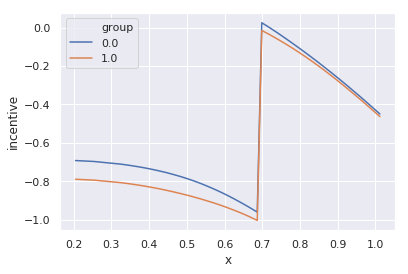

## Reject Options TPR

(100, 2) (100, 2)
97.0  before:  98.0
Runs:  1 
 Eps:  0.31  (+-  0.0 ) 
 Acc h:  0.28  (+-  0.0 ) 

StatPar Δ: -0.03
Feature x (mean):
(UP) Post: 0.58 (+- 0.0 )
(P) Post : 0.78 (+- 0.0 )
Post    Δ: 0.2
Pre     Δ: 0.22
(UP) pre TPR: 0.6538461538461539
(P) pre TPR: 0.6944444444444444
(UP) post TPR: 0.6666666666666666
(P) post TPR: 0.8901098901098901


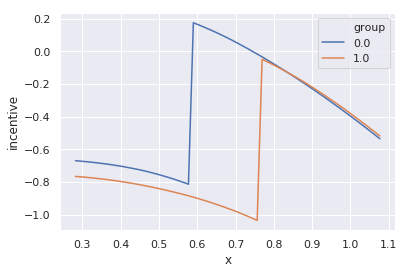

## Reject Options AvgOdds (TPR and FPR)

(100, 2) (100, 2)
155.0  before:  80.0
Runs:  1 
 Eps:  0.02  (+-  0.0 ) 
 Acc h:  0.05  (+-  0.0 ) 

StatPar Δ: 0.16
Feature x (mean):
(UP) Post: 0.6 (+- 0.0 )
(P) Post : 0.72 (+- 0.0 )
Post    Δ: 0.12
Pre     Δ: 0.16
(UP) pre TPR: 0.24
(P) pre TPR: 0.23636363636363636
(UP) post TPR: 0.9230769230769231
(P) post TPR: 0.7402597402597403


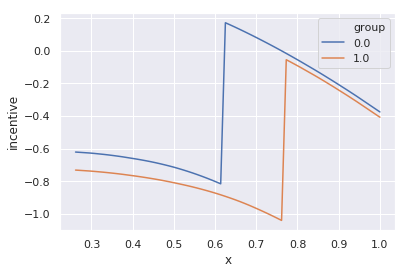

In [8]:
display(Markdown("## Logistic Learner"))
rs = do_sim(LogisticLearner(exclude_protected=True))
print_stats(rs, "noaff")
print("\n")

display(Markdown("## Reject Options TPR"))
rs = do_sim(RejectOptionsLogisticLearner(privileged_groups, unprivileged_groups, metric_name='Equal opportunity difference'))
print_stats(rs, "postRejOpTPR")
print("\n")

display(Markdown("## Reject Options AvgOdds (TPR and FPR)"))
rs = do_sim(RejectOptionsLogisticLearner(privileged_groups, unprivileged_groups, metric_name='Average odds difference'))
print_stats(rs, "postRejOpTPRandFPR")
print("\n")
        
        